In [59]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("C:\\Users\\alackey\\Downloads\\insurance - insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [30]:
# State your Null Hypothesis and Alternative Hypothesis
# - Q1. Do smokers have higher insurance charges than non-smokers?
# Null: smokers and non smokers do not have significantly different insurance charges.
# Alternative: Smokers have significantly higher insurance charges than non-smokers.

In [31]:
#Numeric data from two different groups means we should use an independent t-test

#split into groups
smoker_df = df.loc[df['smoker']== 'yes'].copy()
no_smoker_df = df.loc[df['smoker']== 'no'].copy()
smoker_charge = smoker_df['charges']
no_smoker_charge = no_smoker_df['charges']
smoker_charge

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [32]:
#outlier check.
zscores= stats.zscore(smoker_charge)
outliers = abs(zscores)>3
np.sum(outliers)

0

In [33]:
zscores= stats.zscore(no_smoker_charge)
outliers = abs(zscores)>3
np.sum(outliers)

24

In [34]:
#drop outlier
no_smoker_charge = no_smoker_charge[(np.abs(stats.zscore(no_smoker_charge)) < 3)]

In [39]:
#both have n>15 so normality is fine.
smoker_charge.count()
no_smoker_charge.count()

1040

In [40]:
#equal variance check.
result = stats.levene(smoker_charge, no_smoker_charge)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

In [41]:
#need to use equal_var=False because the pvalue <0.05
result = stats.ttest_ind(smoker_charge, no_smoker_charge, equal_var = False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

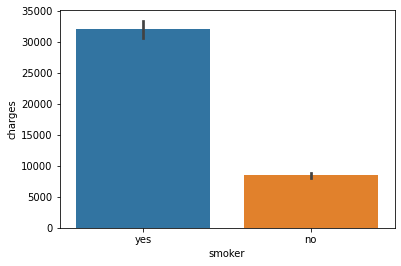

In [61]:
#Pvalue << 0.05 so we can reject the null hypothesis, there is a significant difference in charges between smokers and non smokers.
sns.barplot(data=df, x='smoker',y='charges');

In [ ]:
# State your Null Hypothesis and Alternative Hypothesis
#- Q2. Are men more likely to smoke than women?
# Null: there is not a significant difference in the likelihood of smoking between men and women.
# Alternative: there is a significant different in the likelihood of smoking between men and women.

In [44]:
#categorical chi-squared test.
#contingency table setup.

table = pd.crosstab(df['sex'], df['smoker'])
table

#running the test
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result
print(p)
p<.05

0.006548143503580696


True

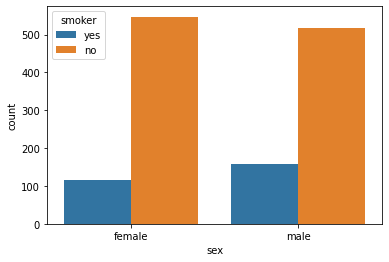

In [63]:
#there are two categorical variables and the outcomes are independent, so the assumptions are met.
#reject the null, there is a significant difference between the genders for smoking, with men smoking more.
ax = sns.countplot(data=df, x='sex',hue='smoker',)

In [45]:
# State your Null Hypothesis and Alternative Hypothesis
#- Q3. Do different regions have different charges, on average?
# Null: there is not a significant difference in charges by region on average.
# Alternative: there is a significant difference in charges by region on average.

In [47]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [48]:
#more than 2 in the comparison and numeric data means we need to use ANOVA and/or Tukey.

#separate our groups:
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [50]:
#Normality can be assumed due to each category having n>15
#Checking equal variance
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

In [54]:
#running the test
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

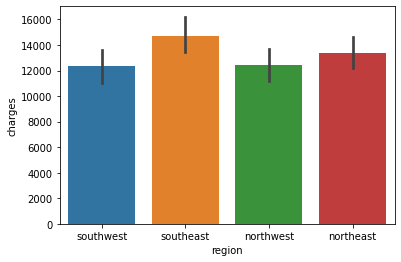

In [60]:
#we can reject the null hypothesis, there is a significant difference in charges across regions.
sns.barplot(data=df, x='region',y='charges');